In [24]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [25]:
class BatsmanState(TypedDict):
    
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundary_percent: float
    summary: str

In [26]:
def calculate_sr(state: BatsmanState):

    sr = (state['runs']/state['balls'])*100

    return {'sr':sr}

In [27]:
def calculate_bpb(state: BatsmanState):

    bpb = state['balls']/(state['fours']+state['sixes'])


    return {'bpb':bpb}

In [28]:
def calculate_boundary_percent(state: BatsmanState):

    boundary_percent = (((state['fours']*4)+(state['sixes']*6))/state['runs'])*100

    return {'boundary_percent':boundary_percent}

In [29]:
def summary(state: BatsmanState):

    summary = f"""
        Strike Rate: {state['sr']}
        Balls per Boundary: {state['bpb']}
        Boundary Percentage: {state['boundary_percent']}
"""
    
    return {'summary':summary}

In [30]:
graph = StateGraph(BatsmanState)

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('summary', summary)

graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percent')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundary_percent', 'summary')

graph.add_edge('summary', END)

workflow = graph.compile()

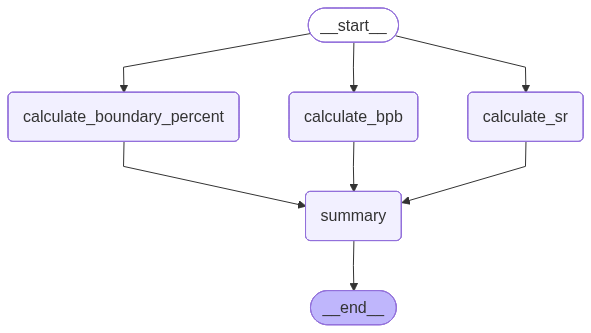

In [31]:
workflow

In [33]:
initail_state = {
    'runs':100,
    'balls':50,
    'fours':6,
    'sixes':4
}

workflow.invoke(initail_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percent': 48.0,
 'summary': '\n        Strike Rate: 200.0\n        Balls per Boundary: 5.0\n        Boundary Percentage: 48.0\n'}